In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# matplotlib 라이브러리가 한국어를 지원 x 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows & Mac 대응)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
# plt.rcParams["font.family"] = "AppleGothic"  # Mac (애플 고딕)

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False


   duty_category language_required  count  total_jobs  percentage
0             AI                무관    434         449       96.66
1             AI                영어     14         449        3.12
2             AI               일본어      1         449        0.22
3            ERP                무관     35          37       94.59
4            ERP                영어      2          37        5.41
5             PM                무관    140         152       92.11
6             PM                영어     11         152        7.24
7             PM               일본어      1         152        0.66
8             QA                무관    155         162       95.68
9             QA                영어      7         162        4.32
10            VR                무관     15          15      100.00
11            게임                무관     21          23       91.30
12            게임                영어      2          23        8.70
13        데이터 분석                무관    129         132       97.73
14        

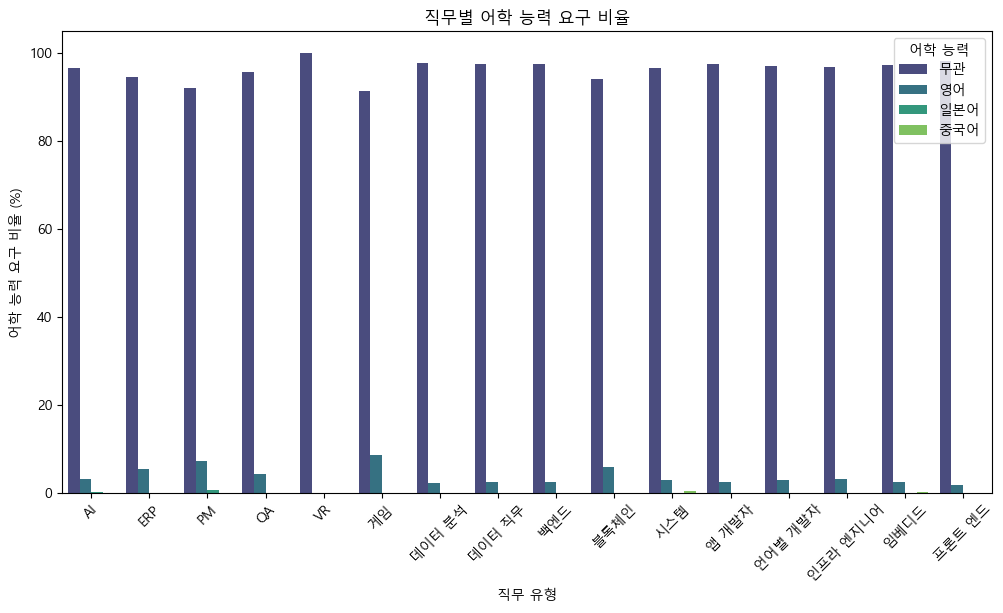

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SQLite 데이터베이스 연결 (파일이 없으면 생성됨)
db_path = "asia.db"  # SQLite DB 파일 경로 지정
conn = sqlite3.connect(db_path)  # DB 연결
cursor = conn.cursor()  # 커서 생성

# SQL 쿼리 작성
sql_query = """
WITH total_count AS (
    SELECT 
        category AS duty_category, 
        COUNT(*) AS total_jobs
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS filtered_data
    GROUP BY category
)

SELECT 
    f.category AS duty_category, 
    CASE 
        WHEN f.language = 1 THEN '영어'
        WHEN f.language = 2 THEN '일본어'
        WHEN f.language = 3 THEN '중국어'
        ELSE '무관'
    END AS language_required,
    COUNT(*) AS count,
    t.total_jobs,
    ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
FROM (
    SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
    UNION ALL
    SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
    UNION ALL
    SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
    UNION ALL
    SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
    UNION ALL
    SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
    UNION ALL
    SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
    UNION ALL
    SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
    UNION ALL
    SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
    UNION ALL
    SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
    UNION ALL
    SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
    UNION ALL
    SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
    UNION ALL
    SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
    UNION ALL
    SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
    UNION ALL
    SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
    UNION ALL
    SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
    UNION ALL
    SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
) AS f
JOIN total_count t ON f.category = t.duty_category
GROUP BY f.category, language_required, t.total_jobs
ORDER BY f.category, percentage DESC;
"""

# Pandas로 데이터 가져오기
df = pd.read_sql_query(sql_query, conn)

# DB 연결 해제
conn.close()

# 데이터 확인
print(df)

# 데이터프레임 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="duty_category", y="percentage", hue="language_required", palette="viridis")

# 그래프 꾸미기
plt.xticks(rotation=45)
plt.xlabel("직무 유형")
plt.ylabel("어학 능력 요구 비율 (%)")
plt.title("직무별 어학 능력 요구 비율")
plt.legend(title="어학 능력")

# 그래프 출력
plt.show()


In [11]:
print(df)

   duty_category language_required  count  total_jobs  percentage
0             AI                무관    434         449       96.66
1             AI                영어     14         449        3.12
2             AI               일본어      1         449        0.22
3            ERP                무관     35          37       94.59
4            ERP                영어      2          37        5.41
5             PM                무관    140         152       92.11
6             PM                영어     11         152        7.24
7             PM               일본어      1         152        0.66
8             QA                무관    155         162       95.68
9             QA                영어      7         162        4.32
10            VR                무관     15          15      100.00
11            게임                무관     21          23       91.30
12            게임                영어      2          23        8.70
13        데이터 분석                무관    129         132       97.73
14        

   duty_category language_required  count  total_jobs  percentage
0             AI                무관    434         449       96.66
1             AI                영어     14         449        3.12
2             AI               일본어      1         449        0.22
3            ERP                무관     35          37       94.59
4            ERP                영어      2          37        5.41
5             PM                무관    140         152       92.11
6             PM                영어     11         152        7.24
7             PM               일본어      1         152        0.66
8             QA                무관    155         162       95.68
9             QA                영어      7         162        4.32
10            VR                무관     15          15      100.00
11            게임                무관     21          23       91.30
12            게임                영어      2          23        8.70
13        데이터 분석                무관    129         132       97.73
14        

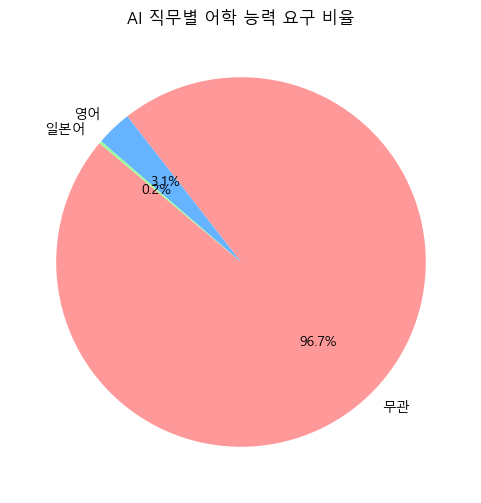

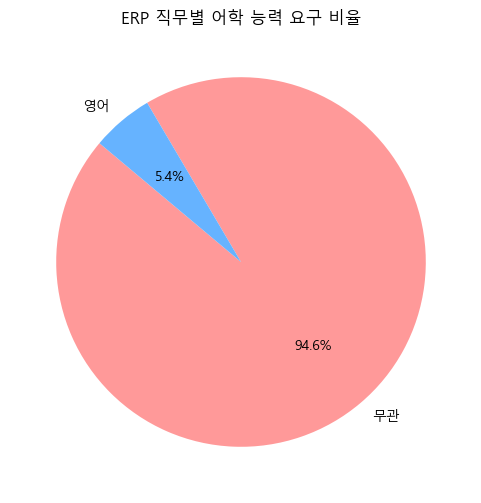

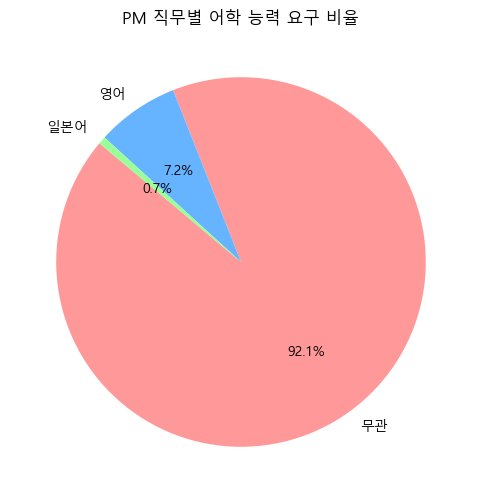

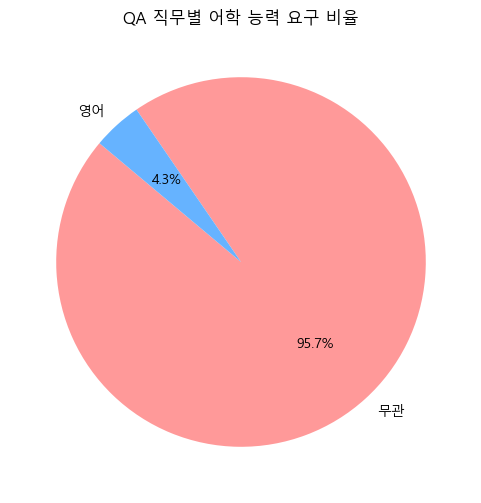

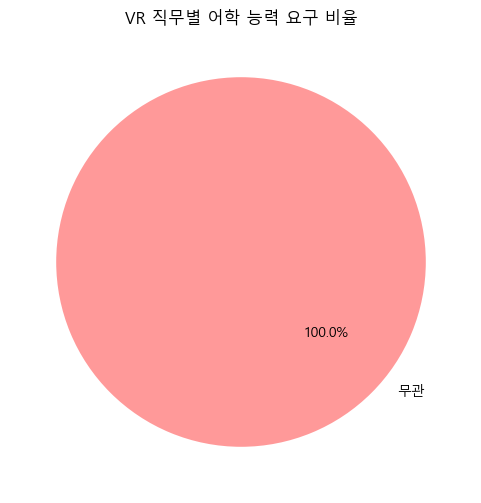

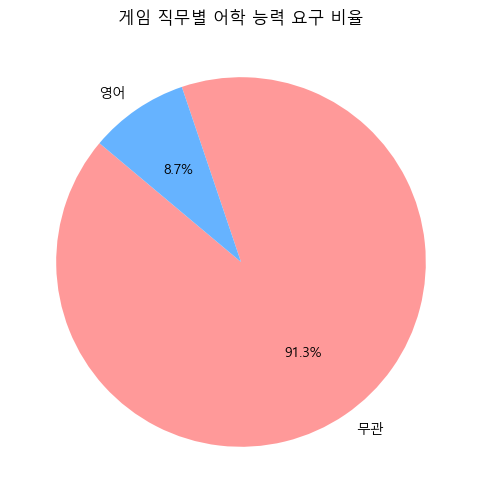

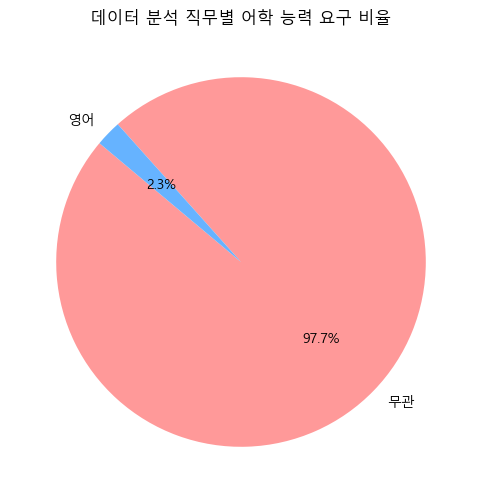

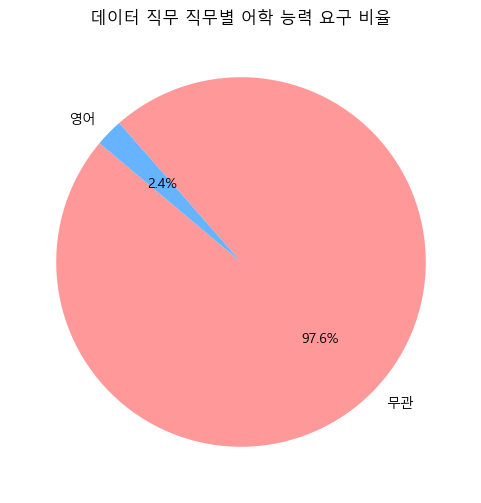

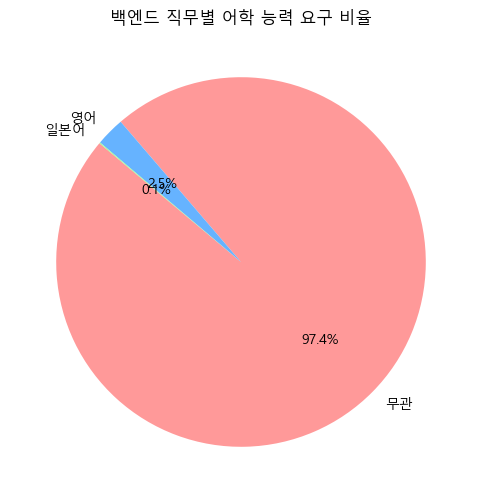

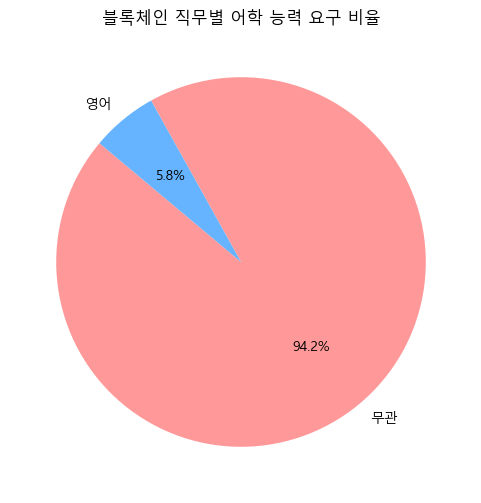

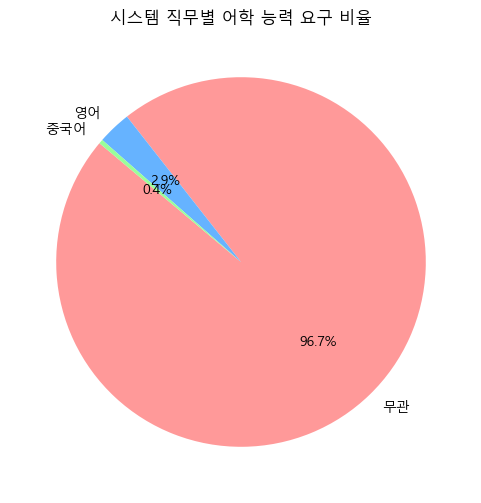

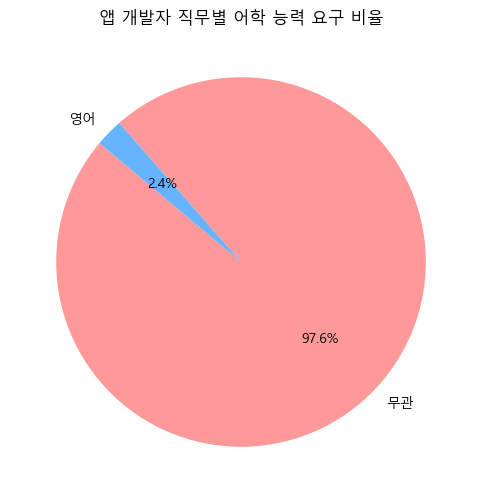

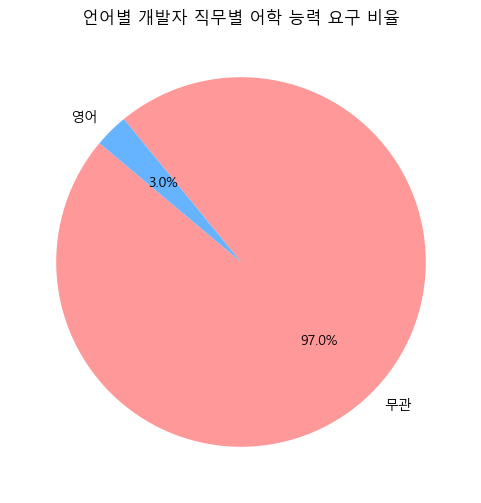

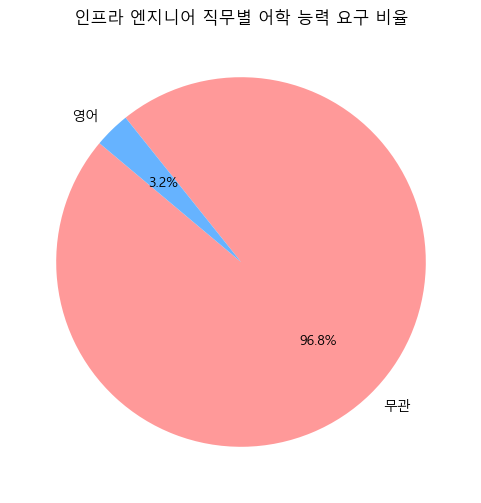

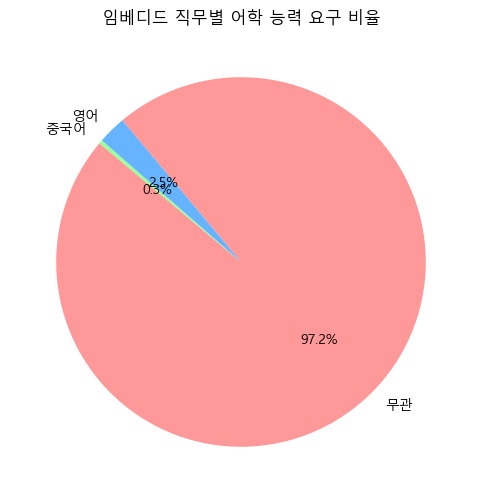

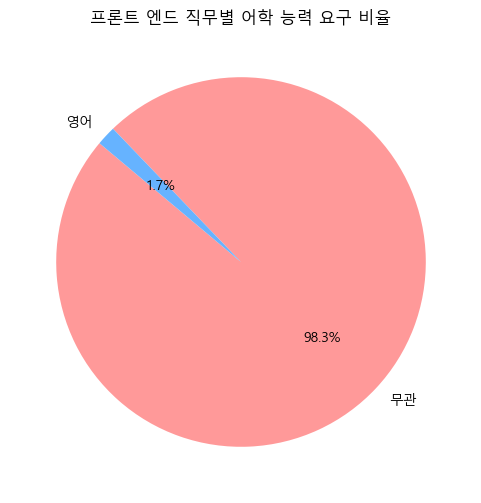

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows & Mac 대응)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
# plt.rcParams["font.family"] = "AppleGothic"  # Mac (애플 고딕)
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# SQLite 데이터베이스 연결
db_path = "asia.db"  # SQLite DB 파일 경로
conn = sqlite3.connect(db_path)  # DB 연결

try:
    # SQL 쿼리 실행
    sql_query = """
    WITH total_count AS (
        SELECT 
            category AS duty_category, 
            COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
            UNION ALL
            SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
            UNION ALL
            SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
            UNION ALL
            SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
            UNION ALL
            SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
            UNION ALL
            SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
            UNION ALL
            SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS duty_category, 
        CASE 
            WHEN f.language = 1 THEN '영어'
            WHEN f.language = 2 THEN '일본어'
            WHEN f.language = 3 THEN '중국어'
            ELSE '무관'
        END AS language_required,
        COUNT(*) AS count,
        t.total_jobs,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, language_required, t.total_jobs
    ORDER BY f.category, percentage DESC;
    """

    # SQLite에서 데이터 가져오기
    df = pd.read_sql_query(sql_query, conn)

    # 한글 깨짐 방지: 컬럼명 공백 제거
    df.columns = df.columns.str.strip()

    # 데이터 확인
    print(df)

    # 원 그래프 시각화 (직무별 어학 요구 비율)
    unique_duties = df["duty_category"].unique()

    # 각 직무별 원 그래프 생성
    for duty in unique_duties:
        df_duty = df[df["duty_category"] == duty]

        # 원 그래프 생성
        plt.figure(figsize=(6, 6))
        plt.pie(
            df_duty["percentage"],
            labels=df_duty["language_required"],
            autopct="%1.1f%%",
            startangle=140,
            colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"],  # 색상 지정
        )
        
        # 제목 설정
        plt.title(f"{duty} 직무별 어학 능력 요구 비율")
        
        # 원 그래프 표시
        plt.show()

except Exception as e:
    print(f"에러 발생: {e}")

finally:
    # DB 연결 해제
    conn.close()


   duty_category language_required  count  total_jobs  percentage
0             AI                무관    434         449       96.66
1             AI                영어     14         449        3.12
2             AI               일본어      1         449        0.22
3            ERP                무관     35          37       94.59
4            ERP                영어      2          37        5.41
5             PM                무관    140         152       92.11
6             PM                영어     11         152        7.24
7             PM               일본어      1         152        0.66
8             QA                무관    155         162       95.68
9             QA                영어      7         162        4.32
10            VR                무관     15          15      100.00
11            게임                무관     21          23       91.30
12            게임                영어      2          23        8.70
13        데이터 분석                무관    129         132       97.73
14        

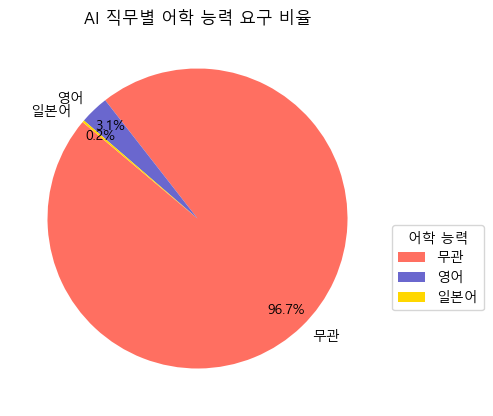

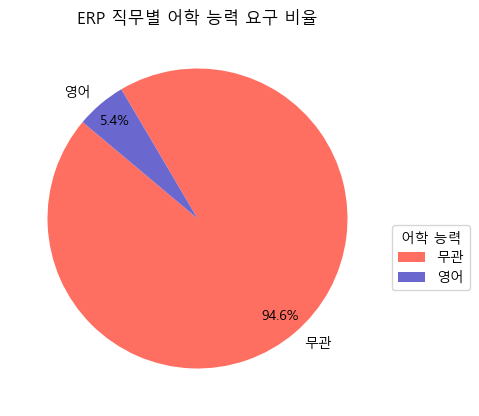

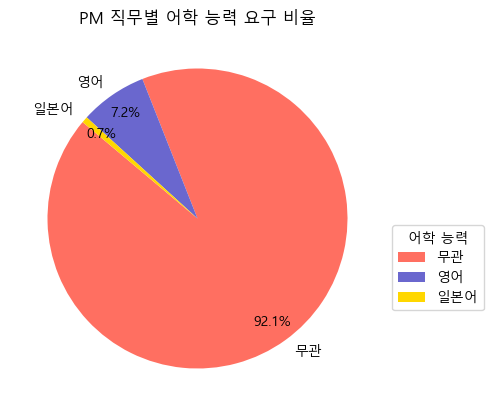

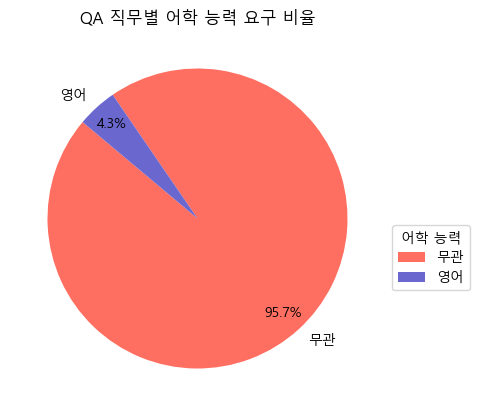

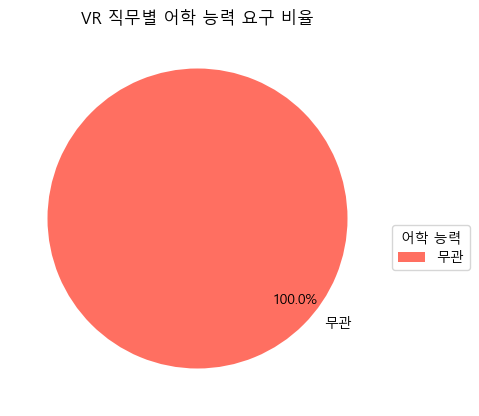

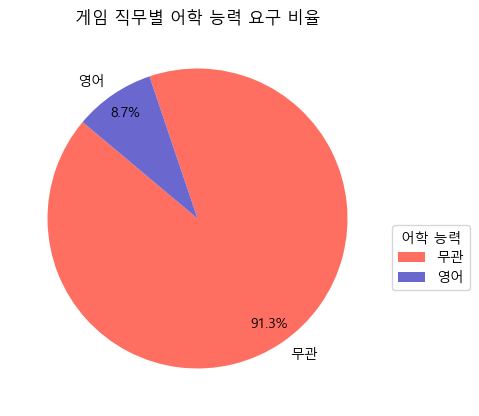

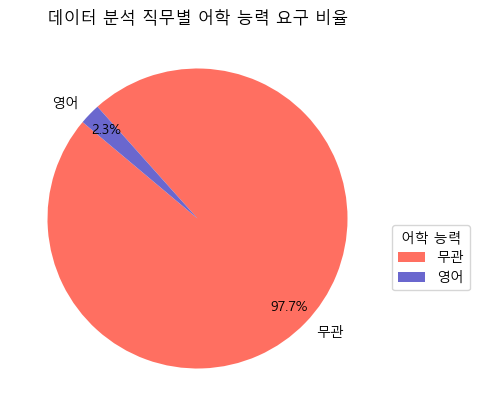

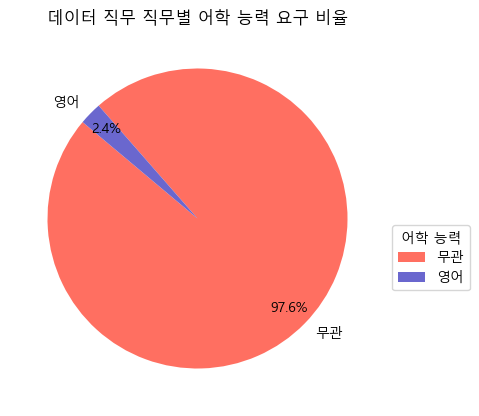

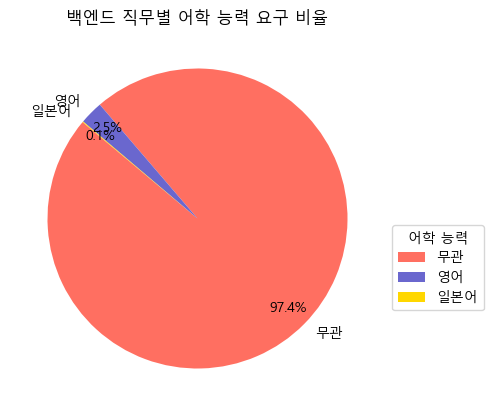

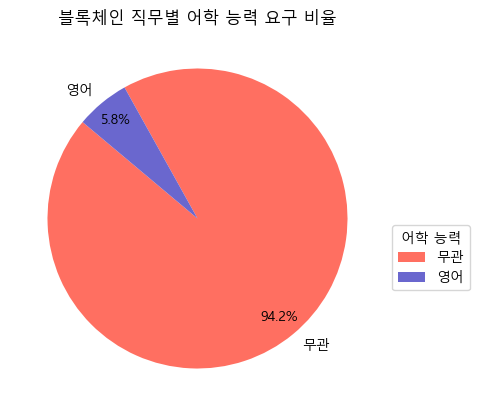

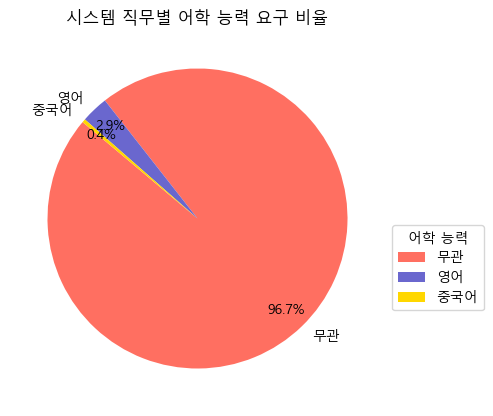

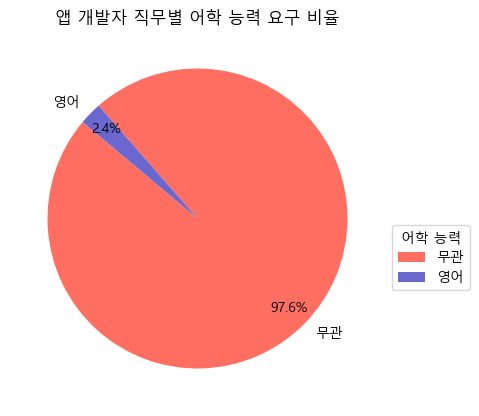

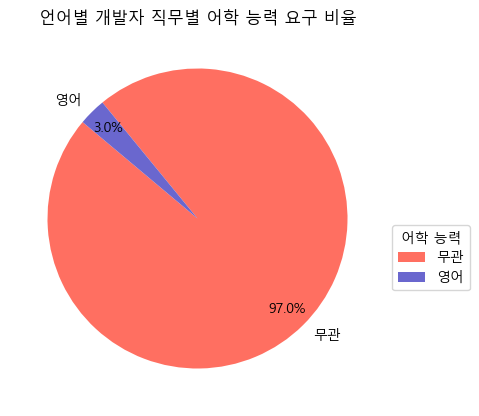

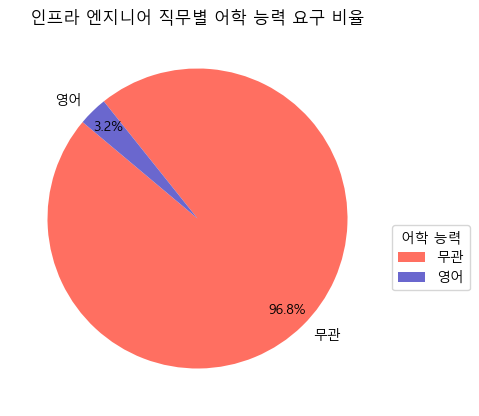

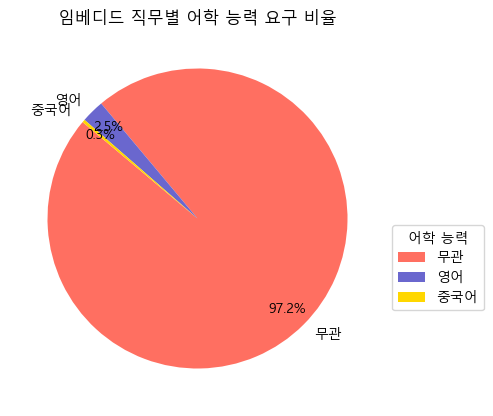

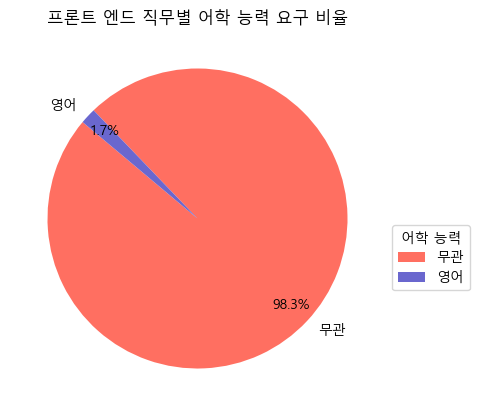

In [ ]:
# 명확한 값 구분을 위해 범례 추가
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows & Mac 대응)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# SQLite 데이터베이스 연결
db_path = "asia.db"  # SQLite DB 파일 경로
conn = sqlite3.connect(db_path)  # DB 연결

try:
    # SQL 쿼리 실행
    sql_query = """
    WITH total_count AS (
        SELECT category AS duty_category, COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
            UNION ALL
            SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
            UNION ALL
            SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
            UNION ALL
            SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
            UNION ALL
            SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
            UNION ALL
            SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
            UNION ALL
            SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS duty_category, 
        CASE 
            WHEN f.language = 1 THEN '영어'
            WHEN f.language = 2 THEN '일본어'
            WHEN f.language = 3 THEN '중국어'
            ELSE '무관'
        END AS language_required,
        COUNT(*) AS count,
        t.total_jobs,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, language_required, t.total_jobs
    ORDER BY f.category, percentage DESC;
    """

    # SQLite에서 데이터 가져오기
    df = pd.read_sql_query(sql_query, conn)

    # 한글 깨짐 방지: 컬럼명 공백 제거
    df.columns = df.columns.str.strip()

    # 데이터 확인
    print(df)

    # 📌 원 그래프 시각화 (직무별 어학 요구 비율)
    unique_duties = df["duty_category"].unique()

    # 각 직무별 원 그래프 생성
    for duty in unique_duties:
        df_duty = df[df["duty_category"] == duty]

        # 원 그래프 생성
        fig, ax = plt.subplots(figsize=(6, 6))

        wedges, texts, autotexts = ax.pie(
            df_duty["percentage"],
            labels=df_duty["language_required"],
            autopct="%1.1f%%",
            startangle=140,
            pctdistance=0.85,  # 퍼센트 표시를 원 밖으로 이동
            colors = ["#FF6F61", "#6A67CE", "#FFD700", "#4CB944"]  ,  # 색상 지정
        )

        # 범례 추가
        ax.legend(wedges, df_duty["language_required"], title="어학 능력", loc="best", bbox_to_anchor=(1, 0.5))

        # 제목 설정
        plt.title(f"{duty} 직무별 어학 능력 요구 비율")

        # 원 그래프 표시
        plt.subplots_adjust(right=0.75)  # 범례 공간 확보
        plt.show()

except Exception as e:
    print(f"에러 발생: {e}")

finally:
    # DB 연결 해제
    conn.close() 


In [23]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows & Mac 대응)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# 이미지 저장 폴더 생성
output_dir = "./charts"
os.makedirs(output_dir, exist_ok=True)  # 폴더가 없으면 생성

# SQLite 데이터베이스 연결
db_path = "asia.db"  # SQLite DB 파일 경로
conn = sqlite3.connect(db_path)  # DB 연결
cursor = conn.cursor()

# 이미지 경로 저장 테이블 생성 (없으면 생성)
cursor.execute("""
CREATE TABLE IF NOT EXISTS image_paths (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    duty_category TEXT,
    image_path TEXT
)
""")
conn.commit()  # 변경 사항 저장

try:
    # SQL 쿼리 실행
    sql_query = """
    WITH total_count AS (
        SELECT category AS duty_category, COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
            UNION ALL
            SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
            UNION ALL
            SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
            UNION ALL
            SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
            UNION ALL
            SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
            UNION ALL
            SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
            UNION ALL
            SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS duty_category, 
        CASE 
            WHEN f.language = 1 THEN '영어'
            WHEN f.language = 2 THEN '일본어'
            WHEN f.language = 3 THEN '중국어'
            ELSE '무관'
        END AS language_required,
        COUNT(*) AS count,
        t.total_jobs,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, language_required, t.total_jobs
    ORDER BY f.category, percentage DESC;
    """

    # SQLite에서 데이터 가져오기
    df = pd.read_sql_query(sql_query, conn)

    # 한글 깨짐 방지: 컬럼명 공백 제거
    df.columns = df.columns.str.strip()

    # 색상 설정
    colors = ["#FF6F61", "#6A67CE", "#FFD700", "#4CB944"]

    # 각 직무별 원 그래프 생성 및 저장
    for duty in df["duty_category"].unique():
        df_duty = df[df["duty_category"] == duty]

        fig, ax = plt.subplots(figsize=(6, 6))

        wedges, texts, autotexts = ax.pie(
            df_duty["percentage"],
            labels=df_duty["language_required"],
            autopct="%1.1f%%",
            startangle=140,
            pctdistance=0.85,
            colors=colors,
        )

        ax.legend(wedges, df_duty["language_required"], title="어학 능력", loc="best", bbox_to_anchor=(1, 0.5))
        plt.title(f"{duty} 직무별 어학 능력 요구 비율")
        plt.subplots_adjust(right=0.75)

        # 이미지 저장 경로 지정
        image_path = os.path.join(output_dir, f"{duty}_어학능력.png")
        plt.savefig(image_path, bbox_inches="tight")  # 그래프 저장
        plt.close(fig)  # 메모리 절약을 위해 그래프 닫기

        # 이미지 경로를 DB에 저장
        cursor.execute("INSERT INTO image_paths (duty_category, image_path) VALUES (?, ?)", (duty, image_path))
        conn.commit()

except Exception as e:
    print(f"에러 발생: {e}")

finally:
    # DB 연결 해제
    conn.close()


In [24]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows & Mac 대응)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# SQLite 데이터베이스 연결
db_path = "asia.db"  # SQLite DB 파일 경로
conn = sqlite3.connect(db_path)  # DB 연결
cursor = conn.cursor()

# 이미지 저장 폴더 생성
output_dir = "./charts2"
os.makedirs(output_dir, exist_ok=True)  # 폴더가 없으면 생성

# `duty_analysis` 테이블 존재 여부 확인
cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='duty_analysis';")
table_exists = cursor.fetchone()

if not table_exists:
    print("❌ `duty_analysis` 테이블이 존재하지 않습니다. 테이블을 생성해야 합니다.")
    conn.close()
else:
    print("✅ `duty_analysis` 테이블이 존재합니다.")

    try:
        # SQL 쿼리 실행
        sql_query = """
        WITH total_count AS (
            SELECT category AS duty_category, COUNT(*) AS total_jobs
            FROM (
                SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
                UNION ALL
                SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
                UNION ALL
                SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
                UNION ALL
                SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
                UNION ALL
                SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
                UNION ALL
                SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
                UNION ALL
                SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
                UNION ALL
                SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
                UNION ALL
                SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
                UNION ALL
                SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
                UNION ALL
                SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
                UNION ALL
                SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
                UNION ALL
                SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
                UNION ALL
                SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
                UNION ALL
                SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
                UNION ALL
                SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
            ) AS filtered_data
            GROUP BY category
        )

        SELECT 
            f.category AS duty_category, 
            CASE 
                WHEN f.language = 1 THEN '영어'
                WHEN f.language = 2 THEN '일본어'
                WHEN f.language = 3 THEN '중국어'
                ELSE '무관'
            END AS language_required,
            COUNT(*) AS count,
            t.total_jobs,
            ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
            UNION ALL
            SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
            UNION ALL
            SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
            UNION ALL
            SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
            UNION ALL
            SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
            UNION ALL
            SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
            UNION ALL
            SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
        ) AS f
        JOIN total_count t ON f.category = t.duty_category
        GROUP BY f.category, language_required, t.total_jobs
        ORDER BY f.category, percentage DESC;
        """

        # 데이터 가져오기
        df = pd.read_sql_query(sql_query, conn)

        # 한글 깨짐 방지: 컬럼명 공백 제거
        df.columns = df.columns.str.strip()

        # 색상 설정
        colors = ["#FF6F61", "#6A67CE", "#FFD700", "#4CB944"]

        # 각 직무별 원 그래프 생성 및 저장
        for duty in df["duty_category"].unique():
            df_duty = df[df["duty_category"] == duty]

            fig, ax = plt.subplots(figsize=(6, 6))

            ax.pie(
                df_duty["percentage"],
                labels=df_duty["language_required"],
                autopct="%1.1f%%",
                startangle=140,
                pctdistance=0.85,
                colors=colors,
            )

            plt.title(f"{duty} 직무별 어학 능력 요구 비율")
            plt.subplots_adjust(right=0.75)

            # 이미지 저장 경로 지정
            image_path = os.path.join(output_dir, f"{duty}_어학능력.png")
            plt.savefig(image_path, bbox_inches="tight")
            plt.close(fig)

            # `duty_analysis` 테이블 업데이트
            cursor.execute("""
                UPDATE duty_analysis SET language = ? WHERE duty = ?
            """, (image_path, duty))
            conn.commit()

        print("✅ 모든 직무별 시각화 이미지가 저장되고 DB에 반영되었습니다.")

    except Exception as e:
        print(f"❌ 에러 발생: {e}")

    finally:
        conn.close()


✅ `duty_analysis` 테이블이 존재합니다.
✅ 모든 직무별 시각화 이미지가 저장되고 DB에 반영되었습니다.


# 최종 코드 
img_paths 테이블에 있는 image_path칼럼 값을 duty_analysis 테이블의 language 칼럼에 저장해야하고
img_paths 테이블에 있는 duty_category를 duty_analysis 테이블의 duty에 저장해야해 

In [31]:
import sqlite3

# 업로드된 SQLite 데이터베이스 경로
db_path = "asia.db"  # 업로드된 DB 경로

# SQLite DB 연결
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

try:
    # `duty_analysis` 테이블이 존재하는지 확인
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='duty_analysis';")
    duty_analysis_exists = cursor.fetchone()

    # `image_paths` 테이블이 존재하는지 확인
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='image_paths';")
    image_paths_exists = cursor.fetchone()

    if not duty_analysis_exists:
        print("❌ `duty_analysis` 테이블이 존재하지 않습니다.")
    elif not image_paths_exists:
        print("❌ `image_paths` 테이블이 존재하지 않습니다.")
    else:
        print("✅ 두 개의 테이블이 모두 존재합니다. 데이터 업데이트 진행 중...")

        # `image_paths` 테이블에서 `duty_category`와 `image_path` 가져오기
        query = "SELECT duty_category, image_path FROM image_paths;"
        df = pd.read_sql_query(query, conn)

        # `duty_analysis` 테이블에 업데이트
        for index, row in df.iterrows():
            cursor.execute("""
                UPDATE duty_analysis 
                SET language = ? 
                WHERE duty = ?;
            """, (row["image_path"], row["duty_category"]))
        
        conn.commit()
        print("✅ `duty_analysis` 테이블의 `language` 컬럼이 업데이트되었습니다.")

except Exception as e:
    print(f"❌ 에러 발생: {e}")

finally:
    # DB 연결 종료
    conn.close()


✅ 두 개의 테이블이 모두 존재합니다. 데이터 업데이트 진행 중...
✅ `duty_analysis` 테이블의 `language` 컬럼이 업데이트되었습니다.


# 최종 2

In [33]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows & Mac 대응)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# SQLite 데이터베이스 연결
db_path = "asia.db"  # SQLite DB 파일 경로
conn = sqlite3.connect(db_path)  # DB 연결
cursor = conn.cursor()

# 이미지 저장 폴더 생성
output_dir = "charts_language"
os.makedirs(output_dir, exist_ok=True)  # 폴더가 없으면 생성

# `duty_analysis` 테이블 존재 여부 확인 및 생성
cursor.execute("""
CREATE TABLE IF NOT EXISTS duty_analysis (
    duty TEXT PRIMARY KEY,
    language TEXT
);
""")
conn.commit()
print("✅ `duty_analysis` 테이블 확인 및 생성 완료")

try:
    # SQL 쿼리 실행: 직무별 데이터 추출
    sql_query = """
    WITH total_count AS (
        SELECT category AS duty_category, COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
            UNION ALL
            SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
            UNION ALL
            SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
            UNION ALL
            SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
            UNION ALL
            SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
            UNION ALL
            SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
            UNION ALL
            SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS duty_category, 
        CASE 
            WHEN f.language = 1 THEN '영어'
            WHEN f.language = 2 THEN '일본어'
            WHEN f.language = 3 THEN '중국어'
            ELSE '무관'
        END AS language_required,
        COUNT(*) AS count,
        t.total_jobs,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, language_required, t.total_jobs
    ORDER BY f.category, percentage DESC;
    """

    # 데이터 가져오기
    df = pd.read_sql_query(sql_query, conn)

    # 한글 깨짐 방지: 컬럼명 공백 제거
    df.columns = df.columns.str.strip()

    # 색상 설정
    colors = ["#FF6F61", "#6A67CE", "#FFD700", "#4CB944"]

    # 각 직무별 원 그래프 생성 및 저장
    for duty in df["duty_category"].unique():
        df_duty = df[df["duty_category"] == duty]

        fig, ax = plt.subplots(figsize=(6, 6))

        ax.pie(
            df_duty["percentage"],
            labels=df_duty["language_required"],
            autopct="%1.1f%%",
            startangle=140,
            pctdistance=0.85,
            colors=colors,
        )

        plt.title(f"{duty} 직무별 어학 능력 요구 비율")
        plt.subplots_adjust(right=0.75)

        # 이미지 저장 경로 지정
        image_path = os.path.join(output_dir, f"{duty}_어학능력.png")
        plt.savefig(image_path, bbox_inches="tight")
        plt.close(fig)

        # `duty_analysis` 테이블에 데이터 저장 (직무와 이미지 경로)
        cursor.execute("""
            INSERT OR REPLACE INTO duty_analysis (duty, language) VALUES (?, ?)
        """, (duty, image_path))
        conn.commit()

    print("✅ 모든 직무별 시각화 이미지가 저장되고 `duty_analysis` 테이블에 반영되었습니다.")

except Exception as e:
    print(f"❌ 에러 발생: {e}")

finally:
    conn.close()


✅ `duty_analysis` 테이블 확인 및 생성 완료
✅ 모든 직무별 시각화 이미지가 저장되고 `duty_analysis` 테이블에 반영되었습니다.


In [4]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows & Mac 대응)
plt.rcParams["font.family"] = "Malgun Gothic"  # Windows (맑은 고딕)
plt.rcParams["axes.unicode_minus"] = False  # 마이너스 기호 깨짐 방지

# SQLite 데이터베이스 연결
db_path = "asia.db"  # SQLite DB 파일 경로
conn = sqlite3.connect(db_path)  # DB 연결
cursor = conn.cursor()

# 이미지 저장 폴더 생성
output_dir = "Language_charts"
os.makedirs(output_dir, exist_ok=True)  # 폴더가 없으면 생성

# `duty_analysis` 테이블 존재 여부 확인 및 생성
cursor.execute("""
CREATE TABLE IF NOT EXISTS duty_analysis (
    duty TEXT PRIMARY KEY,
    language TEXT
);
""")
conn.commit()
print("✅ `duty_analysis` 테이블 확인 및 생성 완료")

try:
    # SQL 쿼리 실행: 직무별 데이터 추출
    sql_query = """
    WITH total_count AS (
        SELECT category AS duty_category, COUNT(*) AS total_jobs
        FROM (
            SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
            UNION ALL
            SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
            UNION ALL
            SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
            UNION ALL
            SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
            UNION ALL
            SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
            UNION ALL
            SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
            UNION ALL
            SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
            UNION ALL
            SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
            UNION ALL
            SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
            UNION ALL
            SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
            UNION ALL
            SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
            UNION ALL
            SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
            UNION ALL
            SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
            UNION ALL
            SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
            UNION ALL
            SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
            UNION ALL
            SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
        ) AS filtered_data
        GROUP BY category
    )

    SELECT 
        f.category AS duty_category, 
        CASE 
            WHEN f.language = 1 THEN '영어'
            WHEN f.language = 2 THEN '일본어'
            WHEN f.language = 3 THEN '중국어'
            ELSE '무관'
        END AS language_required,
        COUNT(*) AS count,
        t.total_jobs,
        ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS f
    JOIN total_count t ON f.category = t.duty_category
    GROUP BY f.category, language_required, t.total_jobs
    ORDER BY f.category, percentage DESC;
    """

    # 데이터 가져오기
    df = pd.read_sql_query(sql_query, conn)
    df.columns = df.columns.str.strip()  # 한글 깨짐 방지
    
    cursor.execute(sql_query)
    rows = cursor.fetchall()
    print(rows)

    # 원 그래프 생성 및 저장 (각 직무별)
    for duty in df["duty_category"].unique():
        df_duty = df[df["duty_category"] == duty]

        fig, ax = plt.subplots(figsize=(6, 6))

        wedges, texts, autotexts = ax.pie(
            df_duty["percentage"],
            labels=df_duty["language_required"],
            autopct="%1.1f%%",
            startangle=140,
            pctdistance=0.85,
            colors=["#FF6F61", "#6A67CE", "#FFD700", "#4CB944"],
        )

        # 범례 추가
        ax.legend(wedges, df_duty["language_required"], title="어학 능력", loc="best", bbox_to_anchor=(1, 0.5))

        # 제목 설정
        plt.title(f"{duty} 직무별 어학 능력 요구 비율")
        plt.subplots_adjust(right=0.75)

        # 이미지 저장
        image_path = os.path.join(output_dir, f"{duty}_어학능력.png")
        plt.savefig(image_path, bbox_inches="tight")
        plt.close(fig)

        # `duty_analysis` 테이블 업데이트
        cursor.execute("""
            INSERT OR REPLACE INTO duty_analysis (duty, language) VALUES (?, ?)
        """, (duty, image_path))
        conn.commit()

    print("✅ 모든 직무별 시각화 이미지가 저장되고 `duty_analysis` 테이블에 반영되었습니다.")

except Exception as e:
    print(f"❌ 에러 발생: {e}")

finally:
    conn.close()


✅ `duty_analysis` 테이블 확인 및 생성 완료
[('AI', '무관', 434, 449, 96.66), ('AI', '영어', 14, 449, 3.12), ('AI', '일본어', 1, 449, 0.22), ('ERP', '무관', 35, 37, 94.59), ('ERP', '영어', 2, 37, 5.41), ('PM', '무관', 140, 152, 92.11), ('PM', '영어', 11, 152, 7.24), ('PM', '일본어', 1, 152, 0.66), ('QA', '무관', 155, 162, 95.68), ('QA', '영어', 7, 162, 4.32), ('VR', '무관', 15, 15, 100.0), ('게임', '무관', 21, 23, 91.3), ('게임', '영어', 2, 23, 8.7), ('데이터 분석', '무관', 129, 132, 97.73), ('데이터 분석', '영어', 3, 132, 2.27), ('데이터 직무', '무관', 360, 369, 97.56), ('데이터 직무', '영어', 9, 369, 2.44), ('백엔드', '무관', 1276, 1310, 97.4), ('백엔드', '영어', 33, 1310, 2.52), ('백엔드', '일본어', 1, 1310, 0.08), ('블록체인', '무관', 65, 69, 94.2), ('블록체인', '영어', 4, 69, 5.8), ('시스템', '무관', 264, 273, 96.7), ('시스템', '영어', 8, 273, 2.93), ('시스템', '중국어', 1, 273, 0.37), ('앱 개발자', '무관', 280, 287, 97.56), ('앱 개발자', '영어', 7, 287, 2.44), ('언어별 개발자', '무관', 1115, 1149, 97.04), ('언어별 개발자', '영어', 34, 1149, 2.96), ('인프라 엔지니어', '무관', 1199, 1238, 96.85), ('인프라 엔지니어', '영어', 39, 1238, 3.15)

In [ ]:
# gpt api 테스트 

In [ ]:
import sqlite3
import openai

# ✅ OpenAI API 키 설정 (본인의 키로 변경 필요)
openai.api_key = ""


# ✅ SQLite 데이터베이스 연결
db_path = "asia.db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# ✅ SQL 쿼리 실행하여 어학 요구 사항 데이터 가져오기
sql_query = """
WITH total_count AS (
    SELECT category AS duty_category, COUNT(*) AS total_jobs
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS filtered_data
    GROUP BY category
)

SELECT 
    f.category AS duty_category, 
    CASE 
        WHEN f.language = 1 THEN '영어'
        WHEN f.language = 2 THEN '일본어'
        WHEN f.language = 3 THEN '중국어'
        ELSE '무관'
    END AS language_required,
    COUNT(*) AS count,
    t.total_jobs,
    ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
FROM (
    SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
    UNION ALL
    SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
    UNION ALL
    SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
    UNION ALL
    SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
    UNION ALL
    SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
    UNION ALL
    SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
    UNION ALL
    SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
    UNION ALL
    SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
    UNION ALL
    SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
    UNION ALL
    SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
    UNION ALL
    SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
    UNION ALL
    SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
    UNION ALL
    SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
    UNION ALL
    SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
    UNION ALL
    SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
    UNION ALL
    SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
) AS f
JOIN total_count t ON f.category = t.duty_category
GROUP BY f.category, language_required, t.total_jobs
ORDER BY f.category, percentage DESC;
"""

# ✅ 데이터 가져오기
cursor.execute(sql_query)
rows = cursor.fetchall()

# ✅ GPT-3.5 API 호출하여 요약 생성 및 저장
for duty, language, count, total_jobs, percentage in rows:
    prompt = f"""
    "{duty}" 직무의 어학 요구 사항을 분석해주세요.
    - 요구되는 언어: {language}
    - 총 채용 공고 수: {total_jobs}개
    - 특정 언어 요구 공고 수: {count}개
    - 전체 공고 중 해당 언어 요구 비율: {percentage}%
    
    위 정보를 기반으로 해당 직무의 어학 요구 사항을 1~2줄로 요약해주세요.
    """

    try:
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}]
        )
        summary = response.choices[0].message.content.strip()

        # ✅ `language_summary` 칼럼 업데이트
        cursor.execute(
            "UPDATE duty_analysis SET language_summary = ? WHERE duty = ?;",
            (summary, duty)
        )
        conn.commit()

        print(f"✅ {duty} 요약 완료: {summary}")

    except Exception as e:
        print(f"❌ {duty} 요약 실패: {e}")

# ✅ DB 연결 종료
conn.close()
print("🎯 모든 직무의 어학 요구 사항 요약이 완료되었습니다.")


In [3]:
import sqlite3
import openai

# ✅ OpenAI API 키 설정 (본인의 키로 변경 필요)
openai.api_key = ""

# ✅ SQLite 데이터베이스 연결
db_path = "asia (1).db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# ✅ SQL 쿼리 실행하여 어학 요구 사항 데이터 가져오기
sql_query = """
WITH total_count AS (
    SELECT category AS duty_category, COUNT(*) AS total_jobs
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS filtered_data
    GROUP BY category
)

SELECT 
    f.category AS duty_category, 
    CASE 
        WHEN f.language = 1 THEN '영어'
        WHEN f.language = 2 THEN '일본어'
        WHEN f.language = 3 THEN '중국어'
        ELSE '무관'
    END AS language_required,
    COUNT(*) AS count,
    t.total_jobs,
    ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
FROM (
    SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
    UNION ALL
    SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
    UNION ALL
    SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
    UNION ALL
    SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
    UNION ALL
    SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
    UNION ALL
    SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
    UNION ALL
    SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
    UNION ALL
    SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
    UNION ALL
    SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
    UNION ALL
    SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
    UNION ALL
    SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
    UNION ALL
    SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
    UNION ALL
    SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
    UNION ALL
    SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
    UNION ALL
    SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
    UNION ALL
    SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
) AS f
JOIN total_count t ON f.category = t.duty_category
GROUP BY f.category, language_required, t.total_jobs
ORDER BY f.category, percentage DESC;
"""

# ✅ 데이터 가져오기
cursor.execute(sql_query)
rows = cursor.fetchall()

# ✅ GPT-3.5 API 호출하여 요약 생성 및 저장
for duty, language, count, total_jobs, percentage in rows:
    prompt = f"""
    "{duty}" 직무의 어학 요구 사항을 분석해주세요.
    - 요구되는 언어: {language}
    - 총 채용 공고 수: {total_jobs}개
    - 특정 언어 요구 공고 수: {count}개
    - 전체 공고 중 해당 언어 요구 비율: {percentage}%
    
    위 정보를 기반으로 해당 직무의 어학 요구 사항을 1~2줄로 요약해주세요.
    """

    try:
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}]
        )
        summary = response.choices[0].message.content.strip()

        # ✅ 기존 language 칼럼의 값 가져오기 (이미지 경로 유지)
        cursor.execute(
            "SELECT language FROM duty_analysis WHERE duty = ?;",
            (duty,)
        )
        existing_language_data = cursor.fetchone()

        if existing_language_data:
            existing_text = existing_language_data[0]
            updated_text = f"{existing_text} {summary}"  # 기존 값과 요약 결과를 합침
        else:
            updated_text = summary  # 기존 값이 없으면 요약만 저장

        # ✅ `language` 칼럼 업데이트
        cursor.execute(
            "UPDATE duty_analysis SET language = ? WHERE duty = ?;",
            (updated_text, duty)
        )
        conn.commit()

        print(f"✅ {duty} 요약 완료: {summary}")

    except Exception as e:
        print(f"❌ {duty} 요약 실패: {e}")

# ✅ DB 연결 종료
conn.close()
print("🎯 모든 직무의 어학 요구 사항 요약이 완료되었습니다.")


✅ AI 요약 완료: AI 직무에서 언어 요구 사항은 대부분 없으며, 전체 채용 공고의 96.66%에서 특정 언어의 요구가 드물게 있습니다.
✅ AI 요약 완료: AI 직무에서는 영어 능력이 요구되며, 전체 채용 공고 중 3.12%가 영어 능력을 요구하는 것으로 나타났습니다.
✅ AI 요약 완료: "AI" 직무에서는 대부분의 경우에는 일본어 능력이 요구되지 않으며, 특정 언어 요구는 매우 드물다.
✅ ERP 요약 완료: ERP 직무에서는 특정 언어에 대한 요구가 높으며, 전체 공고 중 해당 언어 요구 비율은 94.59%에 이른다.
✅ ERP 요약 완료: ERP 직무의 어학 요구 사항은 영어가 필수이며, 전체 공고 중 해당 언어 요구 비율은 5.41%로서 상대적으로 적은 수준이다.
✅ PM 요약 완료: "PM" 직무에서는 특정 언어에 대한 요구가 매우 높으며, 대부분의 채용 공고에서 해당 언어 능력이 필요합니다.
✅ PM 요약 완료: "PM" 직무에서는 영어 능력이 필수적이며, 약 7.24%의 채용 공고에서 특정 언어(영어) 능력이 요구됩니다.
✅ PM 요약 완료: "PM" 직무에서는 주로 일본어 능력이 요구되며, 해당 언어 요구는 전체 채용 공고의 약 0.66%를 차지하고 있습니다.
✅ QA 요약 완료: QA 직무는 대부분의 경우 특정 언어에 대한 요구가 있으며, 해당 언어에 능통해야 하는 경우가 매우 높습니다.
✅ QA 요약 완료: "QA" 직무는 영어를 요구하는 경우가 많지만 특정 언어 요구는 드물며 전체 공고 중 해당 언어 요구 비율은 4.32%에 불과합니다.
✅ VR 요약 완료: "VR" 직무는 언어에 대한 특정 요구가 없으며, 전체 채용 공고 중 모든 공고에서 언어 능력에 대한 요구가 없다.
✅ 게임 요약 완료: "게임" 직무에서는 언어에 대한 특정 요구가 없는 경우가 드물며, 대부분의 채용 공고에서 특정 언어 능력이 요구된다.
✅ 게임 요약 완료: 게임 직무에서는 영어가 요구되며, 전체 공고 중 해당 언어 요구 비율은 8.7%로 매우 낮은 편입니다.

In [ ]:
# gpt4 모델로 교체 

In [5]:
import sqlite3
import openai

# ✅ OpenAI API 키 설정
openai.api_key = ""

# ✅ SQLite 데이터베이스 연결
db_path = "asia (1).db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [6]:
# ✅ SQL 쿼리 실행하여 어학 요구 사항 데이터 가져오기 (rows 데이터 기반으로 수행)
sql_query = """
WITH total_count AS (
    SELECT category AS duty_category, COUNT(*) AS total_jobs
    FROM (
        SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
        UNION ALL
        SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
        UNION ALL
        SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
        UNION ALL
        SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
        UNION ALL
        SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
        UNION ALL
        SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
        UNION ALL
        SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
        UNION ALL
        SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
        UNION ALL
        SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
        UNION ALL
        SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
        UNION ALL
        SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
        UNION ALL
        SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
        UNION ALL
        SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
        UNION ALL
        SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
        UNION ALL
        SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
        UNION ALL
        SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
    ) AS filtered_data
    GROUP BY category
)

SELECT 
    f.category AS duty_category, 
    CASE 
        WHEN f.language = 1 THEN '영어'
        WHEN f.language = 2 THEN '일본어'
        WHEN f.language = 3 THEN '중국어'
        ELSE '무관'
    END AS language_required,
    COUNT(*) AS count,
    t.total_jobs,
    ROUND(100.0 * COUNT(*) / t.total_jobs, 2) AS percentage
FROM (
    SELECT 'PM' AS category, language FROM processing WHERE duty LIKE '%PM%'
    UNION ALL
    SELECT '데이터 직무' AS category, language FROM processing WHERE duty LIKE '%데이터 직무%'
    UNION ALL
    SELECT '백엔드' AS category, language FROM processing WHERE duty LIKE '%백엔드%'
    UNION ALL
    SELECT '인프라 엔지니어' AS category, language FROM processing WHERE duty LIKE '%인프라 엔지니어%'
    UNION ALL
    SELECT '앱 개발자' AS category, language FROM processing WHERE duty LIKE '%앱 개발자%'
    UNION ALL
    SELECT '게임' AS category, language FROM processing WHERE duty LIKE '%게임%'
    UNION ALL
    SELECT 'AI' AS category, language FROM processing WHERE duty LIKE '%AI%'
    UNION ALL
    SELECT '임베디드' AS category, language FROM processing WHERE duty LIKE '%임베디드%'
    UNION ALL
    SELECT '프론트 엔드' AS category, language FROM processing WHERE duty LIKE '%프론트 엔드%'
    UNION ALL
    SELECT 'QA' AS category, language FROM processing WHERE duty LIKE '%QA%'
    UNION ALL
    SELECT '데이터 분석' AS category, language FROM processing WHERE duty LIKE '%데이터 분석%'
    UNION ALL
    SELECT 'VR' AS category, language FROM processing WHERE duty LIKE '%VR%'
    UNION ALL
    SELECT '시스템' AS category, language FROM processing WHERE duty LIKE '%시스템%'
    UNION ALL
    SELECT '블록체인' AS category, language FROM processing WHERE duty LIKE '%블록체인%'
    UNION ALL
    SELECT 'ERP' AS category, language FROM processing WHERE duty LIKE '%ERP%'
    UNION ALL
    SELECT '언어별 개발자' AS category, language FROM processing WHERE duty LIKE '%언어별 개발자%'
) AS f
JOIN total_count t ON f.category = t.duty_category
GROUP BY f.category, language_required, t.total_jobs
ORDER BY f.category, percentage DESC;
"""

# ✅ 데이터 가져오기
cursor.execute(sql_query)
rows = cursor.fetchall()

# ✅ GPT-4 API 호출하여 요약 생성 및 기존 요약을 덮어쓰기
for duty, language, count, total_jobs, percentage in rows:
    prompt = f"""
    "{duty}" 직무의 어학 요구 사항을 분석해주세요.
    - 요구되는 언어: {language}
    - 총 채용 공고 수: {total_jobs}개
    - 특정 언어 요구 공고 수: {count}개
    - 전체 공고 중 해당 언어 요구 비율: {percentage}%
    
    위 정보를 기반으로 해당 직무의 어학 요구 사항을 1~2줄로 요약해주세요.
    """

    try:
        response = openai.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": prompt}]
        )
        gpt4_summary = response.choices[0].message.content.strip()

        # ✅ 기존 language 칼럼의 값 가져오기 (이미지 경로 유지)
        cursor.execute(
            "SELECT language FROM duty_analysis WHERE duty = ?;",
            (duty,)
        )
        existing_language_data = cursor.fetchone()

        if existing_language_data:
            parts = existing_language_data[0].split(")", 1)  # ")"을 기준으로 이미지 경로와 기존 요약 분리
            image_path = parts[0] + ")" if len(parts) > 1 else existing_language_data[0]  # 이미지 경로 유지
        else:
            image_path = ""

        # ✅ `language` 값 업데이트 (기존 이미지 경로 + 새로운 GPT-4 요약)
        updated_text = f"{image_path} ({gpt4_summary})"

        cursor.execute(
            "UPDATE duty_analysis SET language = ? WHERE duty = ?;",
            (updated_text, duty)
        )
        conn.commit()

        print(f"✅ {duty} 요약 완료 (GPT-4 적용): {gpt4_summary}")

    except Exception as e:
        print(f"❌ {duty} 요약 실패: {e}")

# ✅ DB 연결 종료
conn.close()
print("🎯 모든 직무의 어학 요구 사항 요약이 GPT-4로 업데이트되었습니다.")


✅ AI 요약 완료 (GPT-4 적용): "AI" 직무에서는 총 449개 공고 중 434개 공고에서 특정 언어 능력을 요구하였으며, 이는 전체 공고의 약 96.66%에 해당합니다.
✅ AI 요약 완료 (GPT-4 적용): AI 직무에서는 영어를 요구하는 채용 공고가 전체의 약 3.12%에 해당하며, 이는 449개 중 14개의 공고에서 요구되고 있습니다.
✅ AI 요약 완료 (GPT-4 적용): AI 직무에서 일본어를 요구하는 채용 공고는 전체의 0.22%, 즉 매우 적은 비율로 나타났습니다.
✅ ERP 요약 완료 (GPT-4 적용): ERP 직무에 관한 채용 공고 중 대부분(94.59%)이 특정 언어 능력을 요구하고 있습니다. 언어에 대한 요구사항이 없는 공고는 상대적으로 적은 편입니다.
✅ ERP 요약 완료 (GPT-4 적용): ERP 직무에는 대부분 영어가 요구되며, 전체 채용 공고 중 약 5.41%가 특정 언어를 요구하고 있습니다.
✅ PM 요약 완료 (GPT-4 적용): "PM" 직무는 특정 언어에 대한 역량을 요구하는 비율이 매우 높으며(92.11%), 전체 152개의 채용 공고 중 140개에서 언어 요구 사항이 포함되어 있습니다.
✅ PM 요약 완료 (GPT-4 적용): "PM"직무에는 대부분의 경우 영어 능력이 필요하며, 총 152개의 채용 공고 중 11개(약 7.24%)에서 특정 언어 능력을 요구하고 있습니다.
✅ PM 요약 완료 (GPT-4 적용): 일본어를 요구하는 PM직무 채용 공고는 전체의 0.66%, 즉 152개 중 1개밖에 되지 않습니다.
✅ QA 요약 완료 (GPT-4 적용): "QA" 직무에는 특정 언어 능력이 95.68%의 비율로 매우 높게 요구되며, 따라서 해당 직무를 수행하려는 경우 해당 언어 능력이 필요하다 할 수 있다.
✅ QA 요약 완료 (GPT-4 적용): QA 직무에서는 주로 영어를 요구하며, 전체 채용 공고 중 약 4.32%가 특정 언어를 요구하고 있다.
✅ VR 요약 완료 (GPT-4 적용): 해당 VR 직무에는 